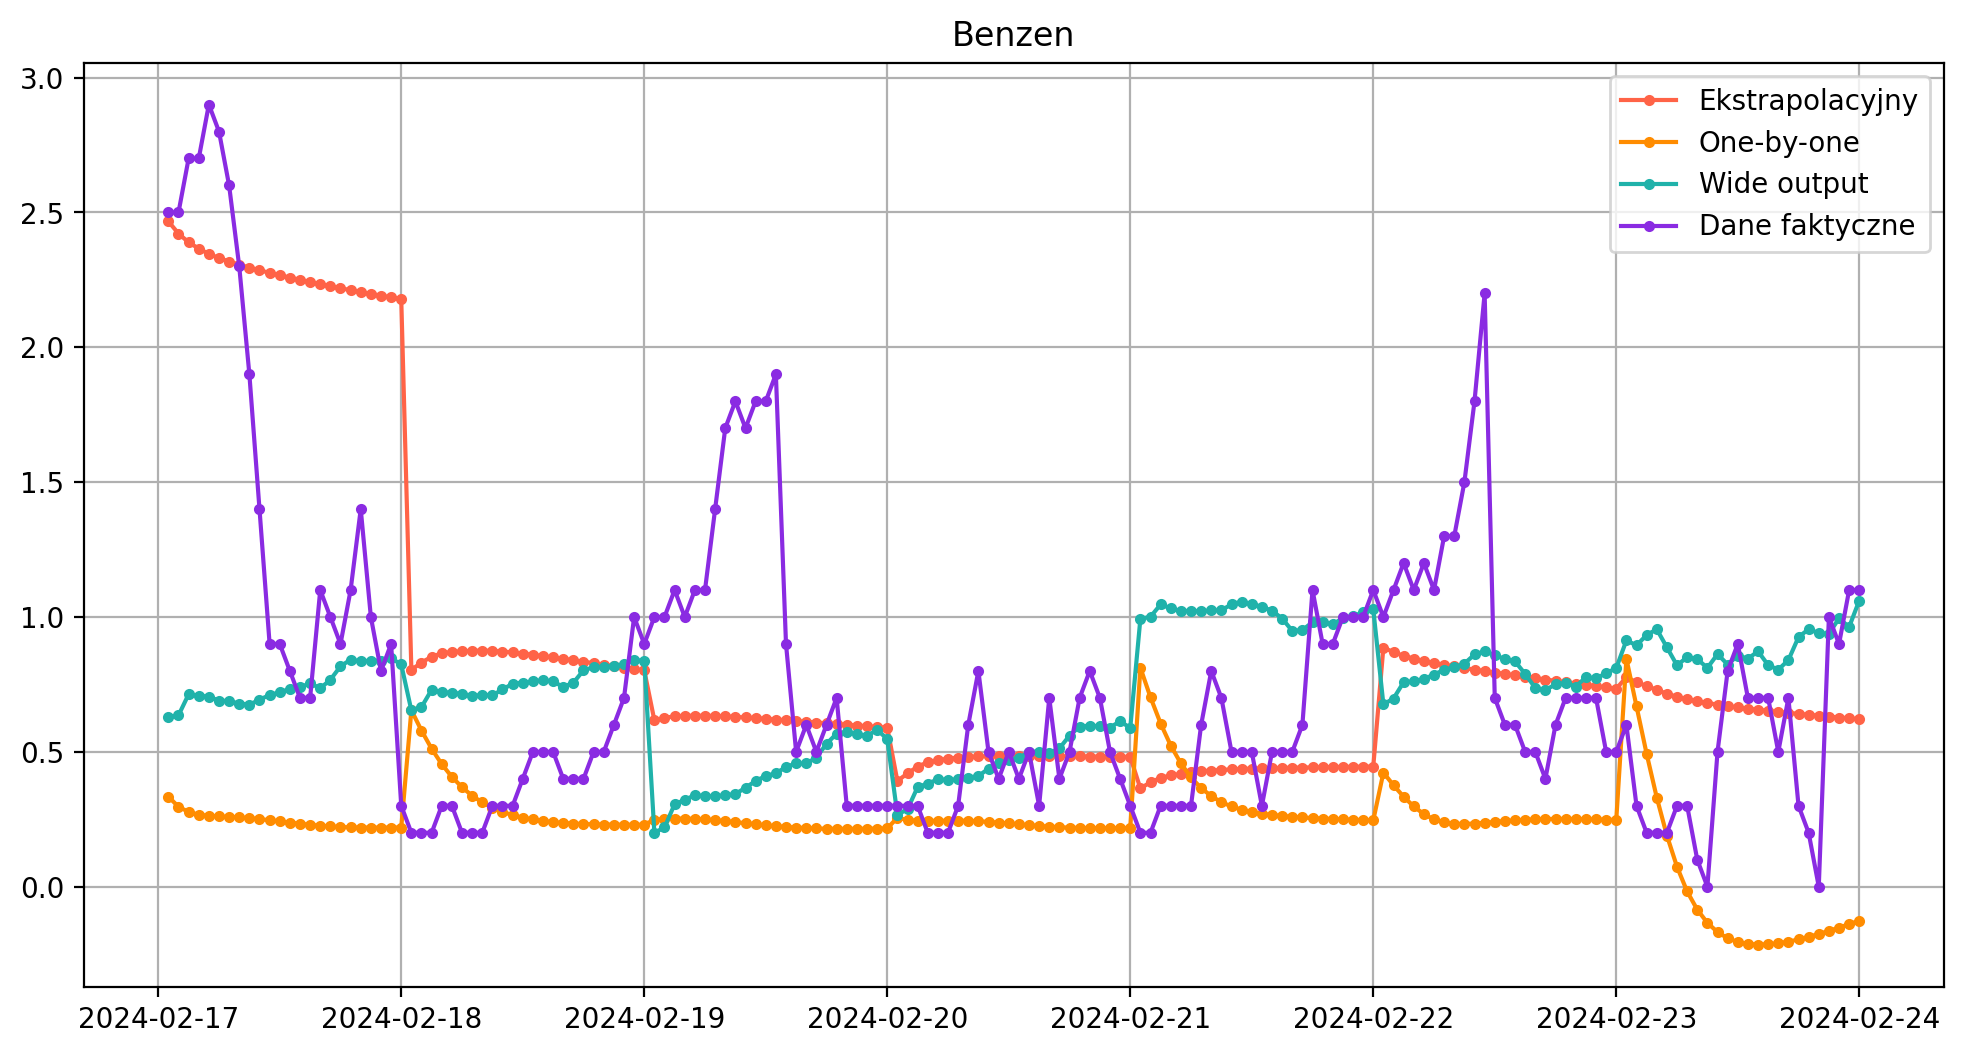

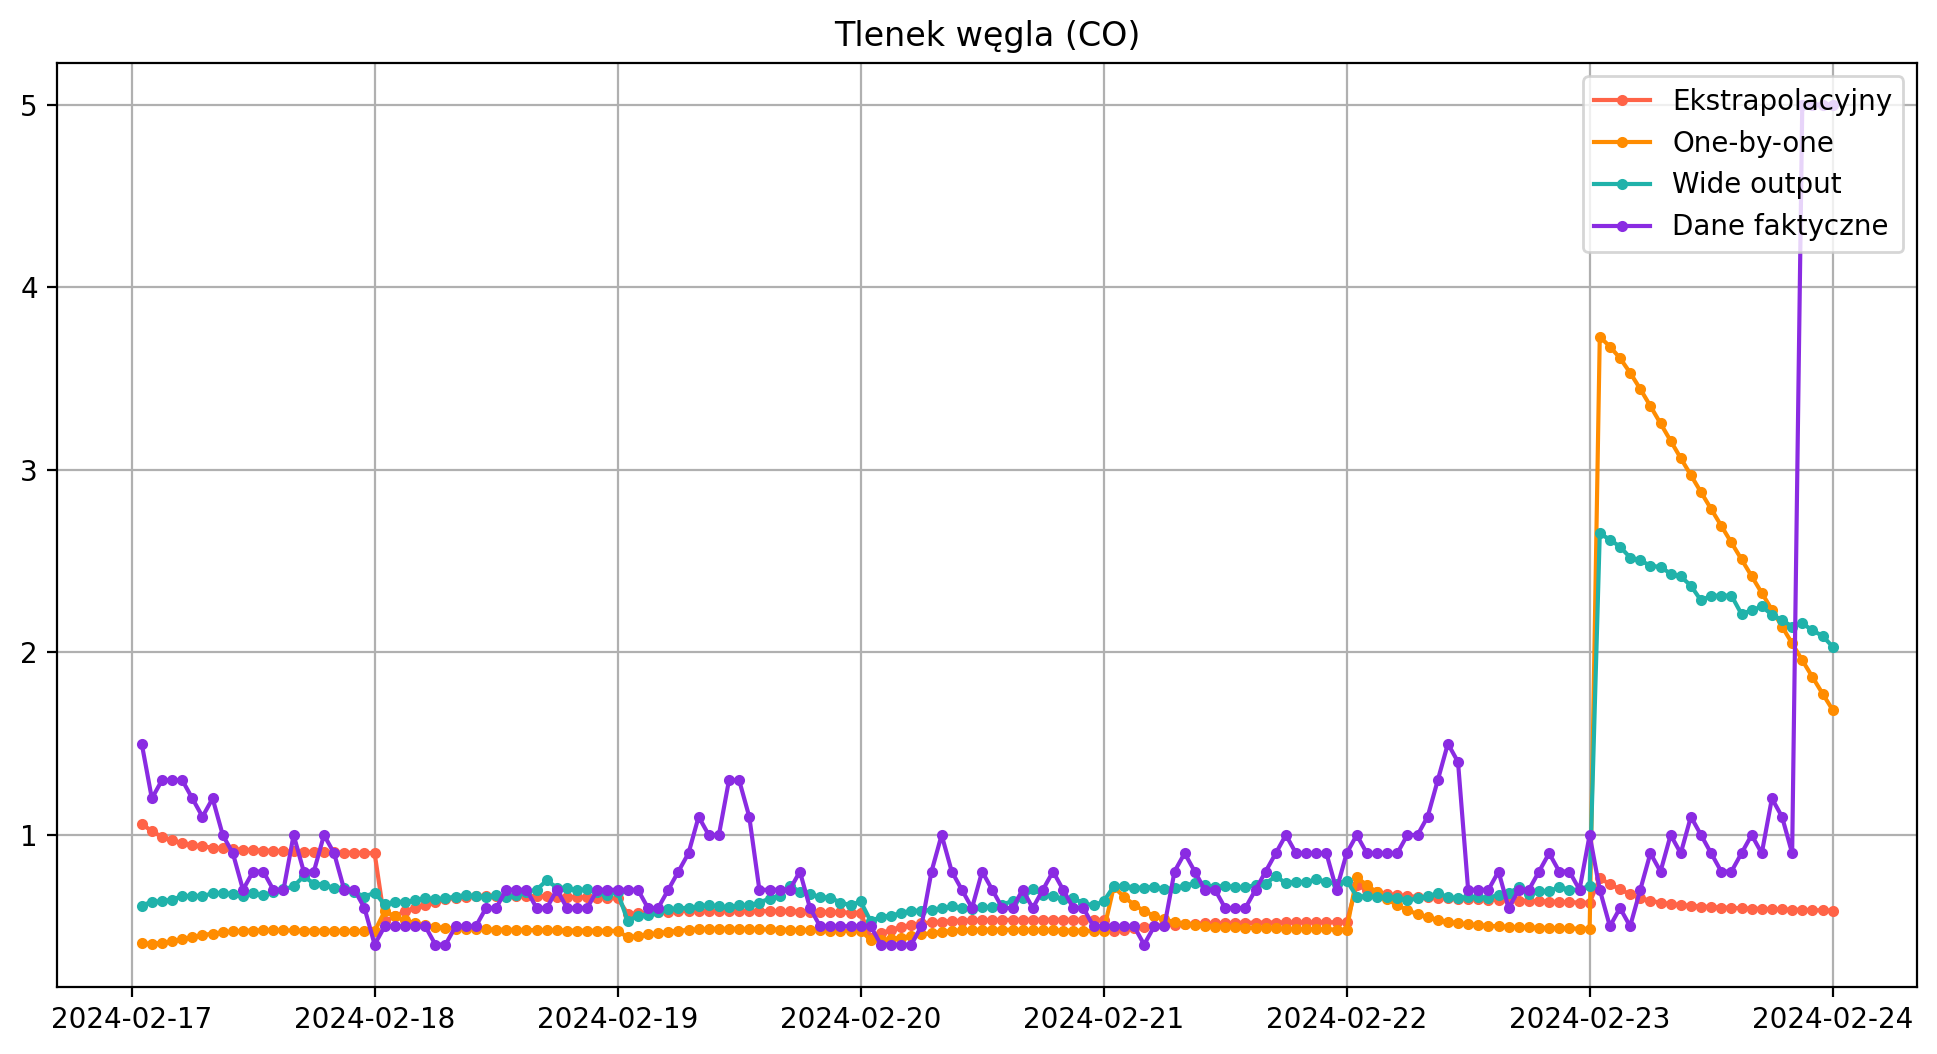

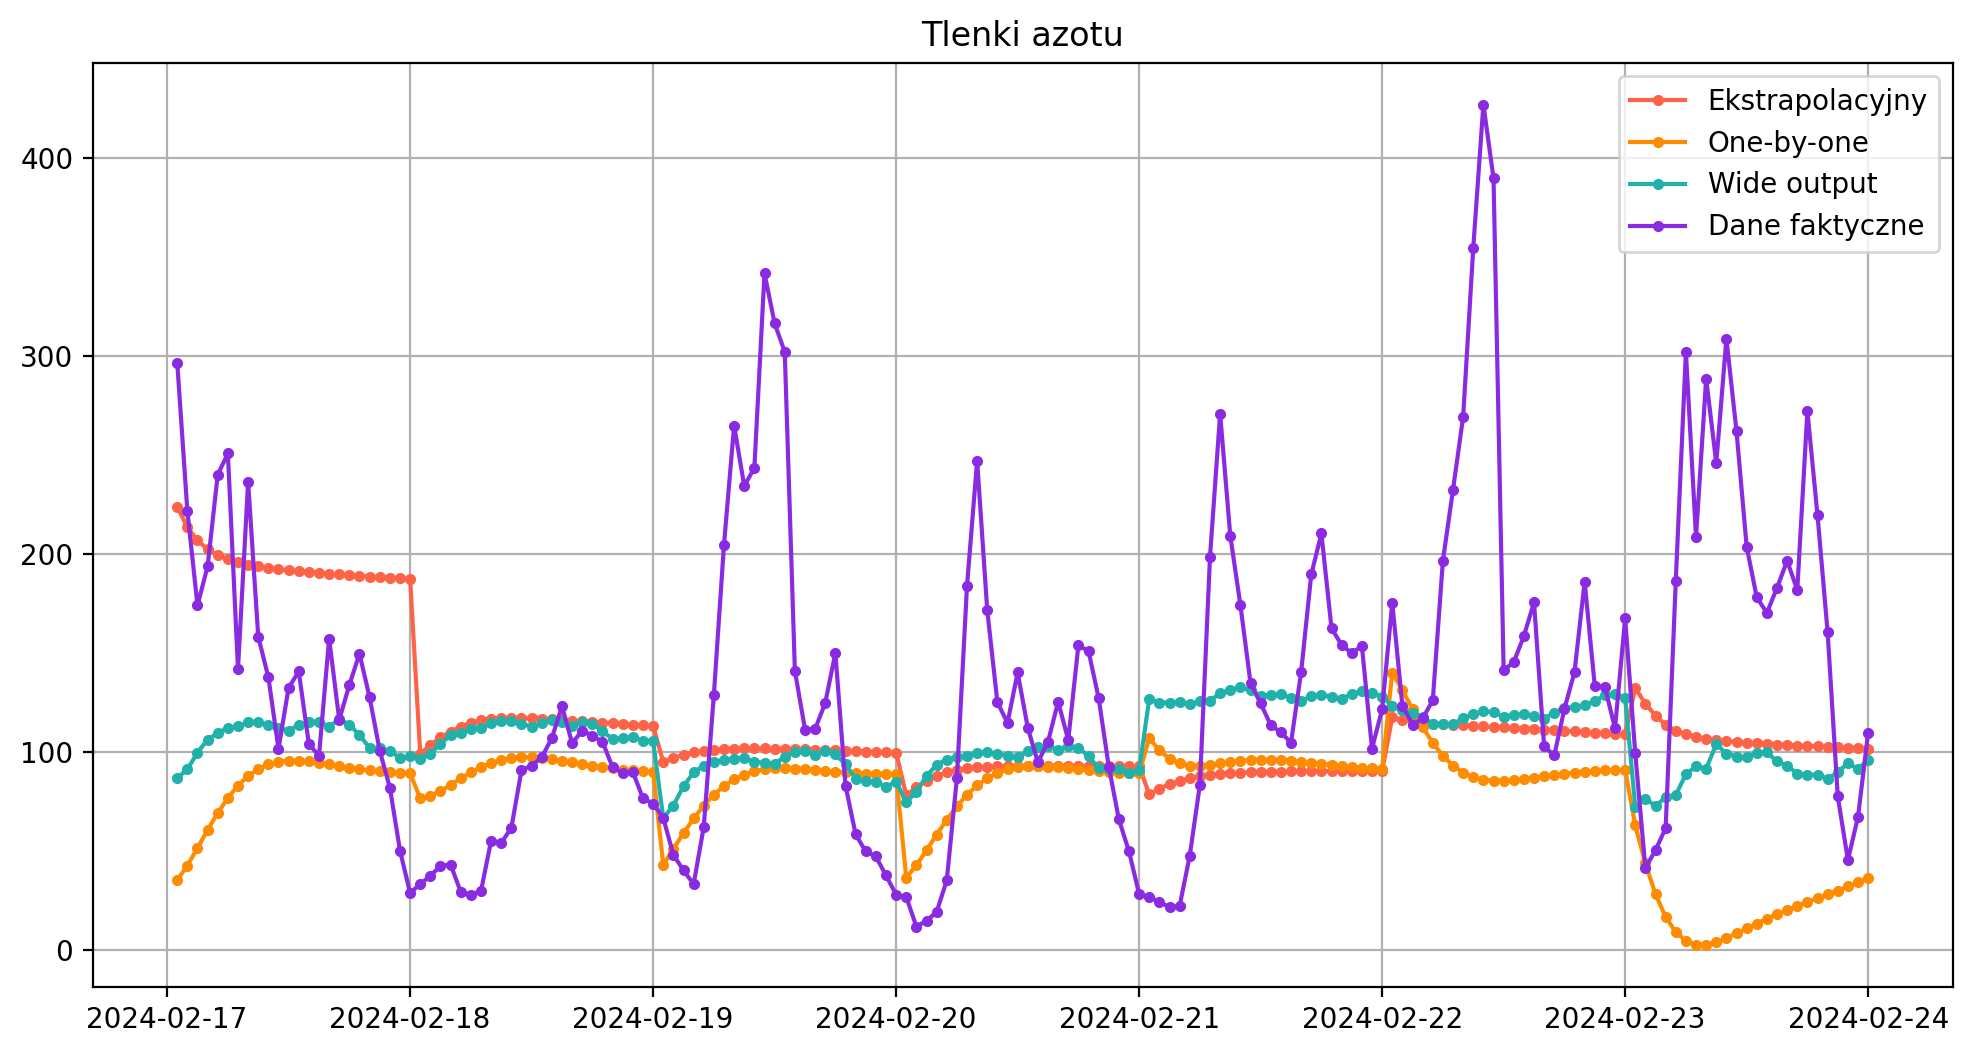

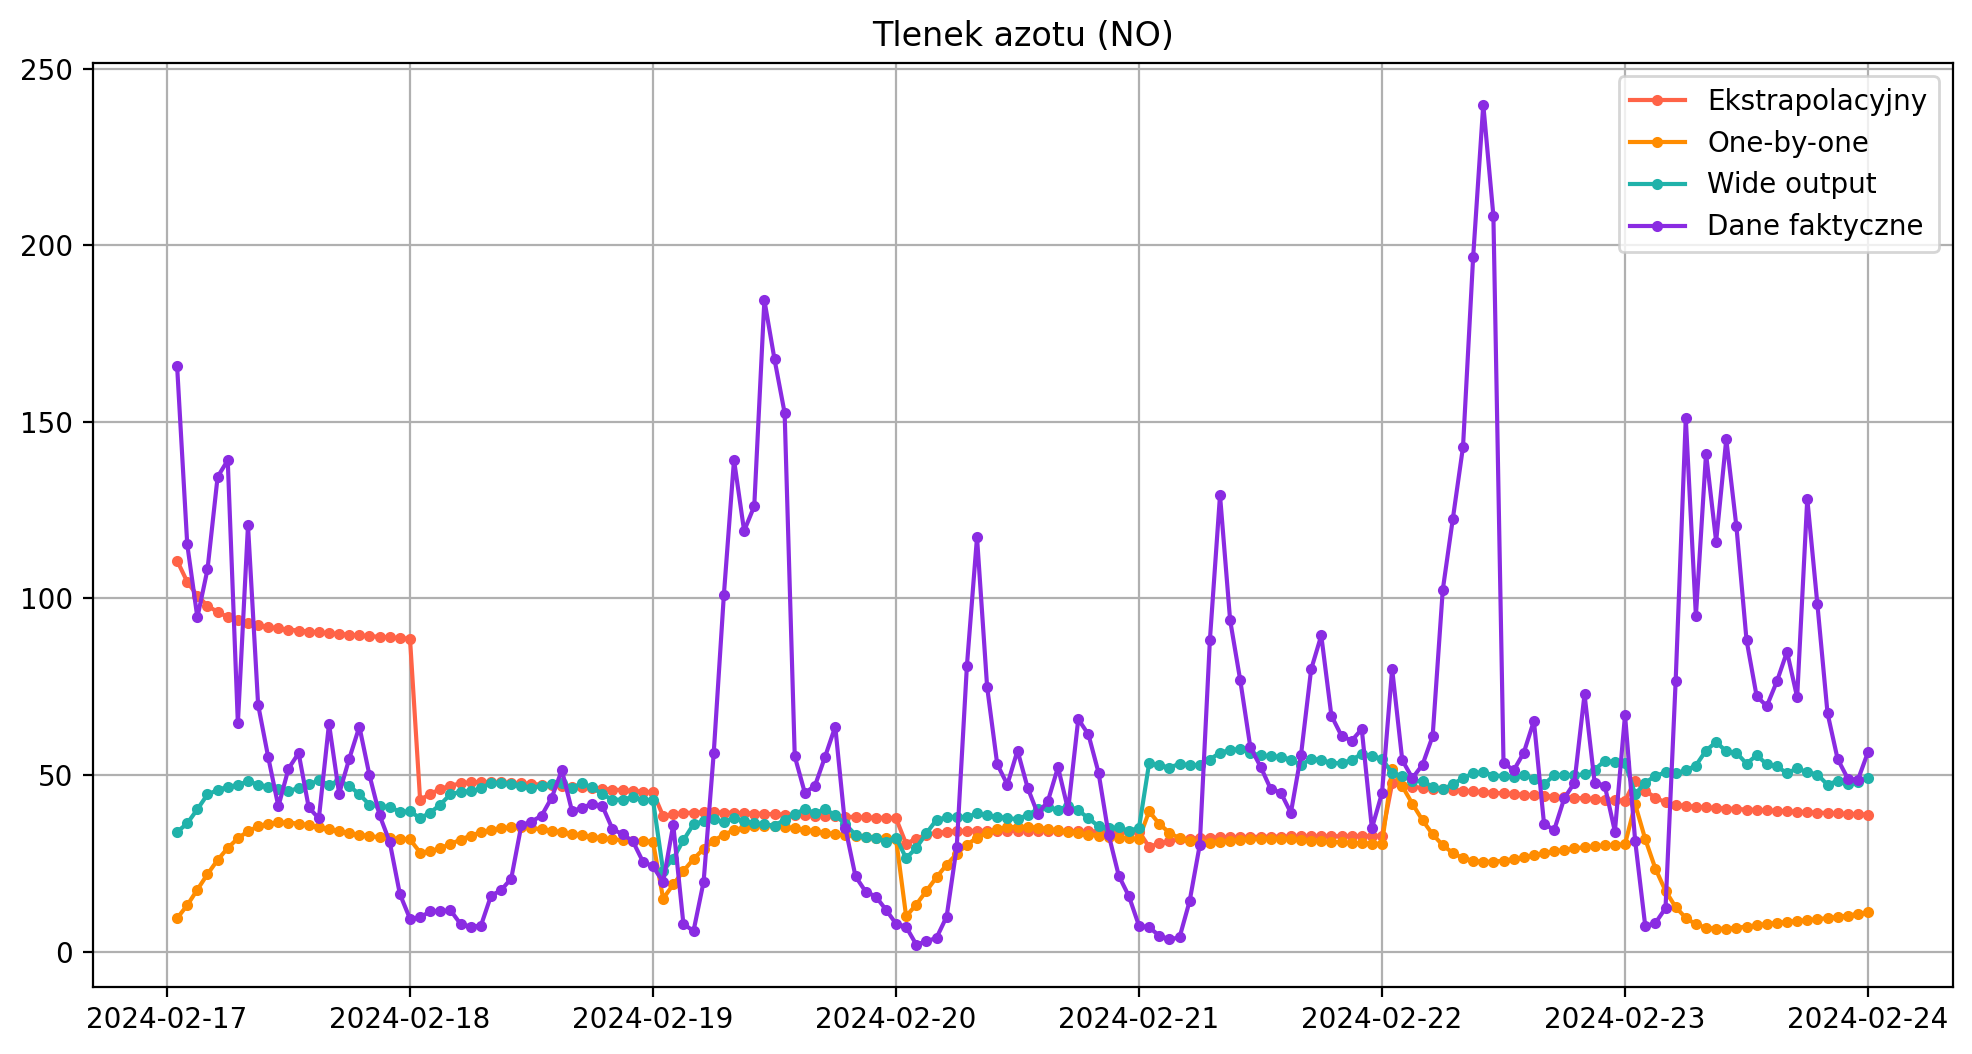

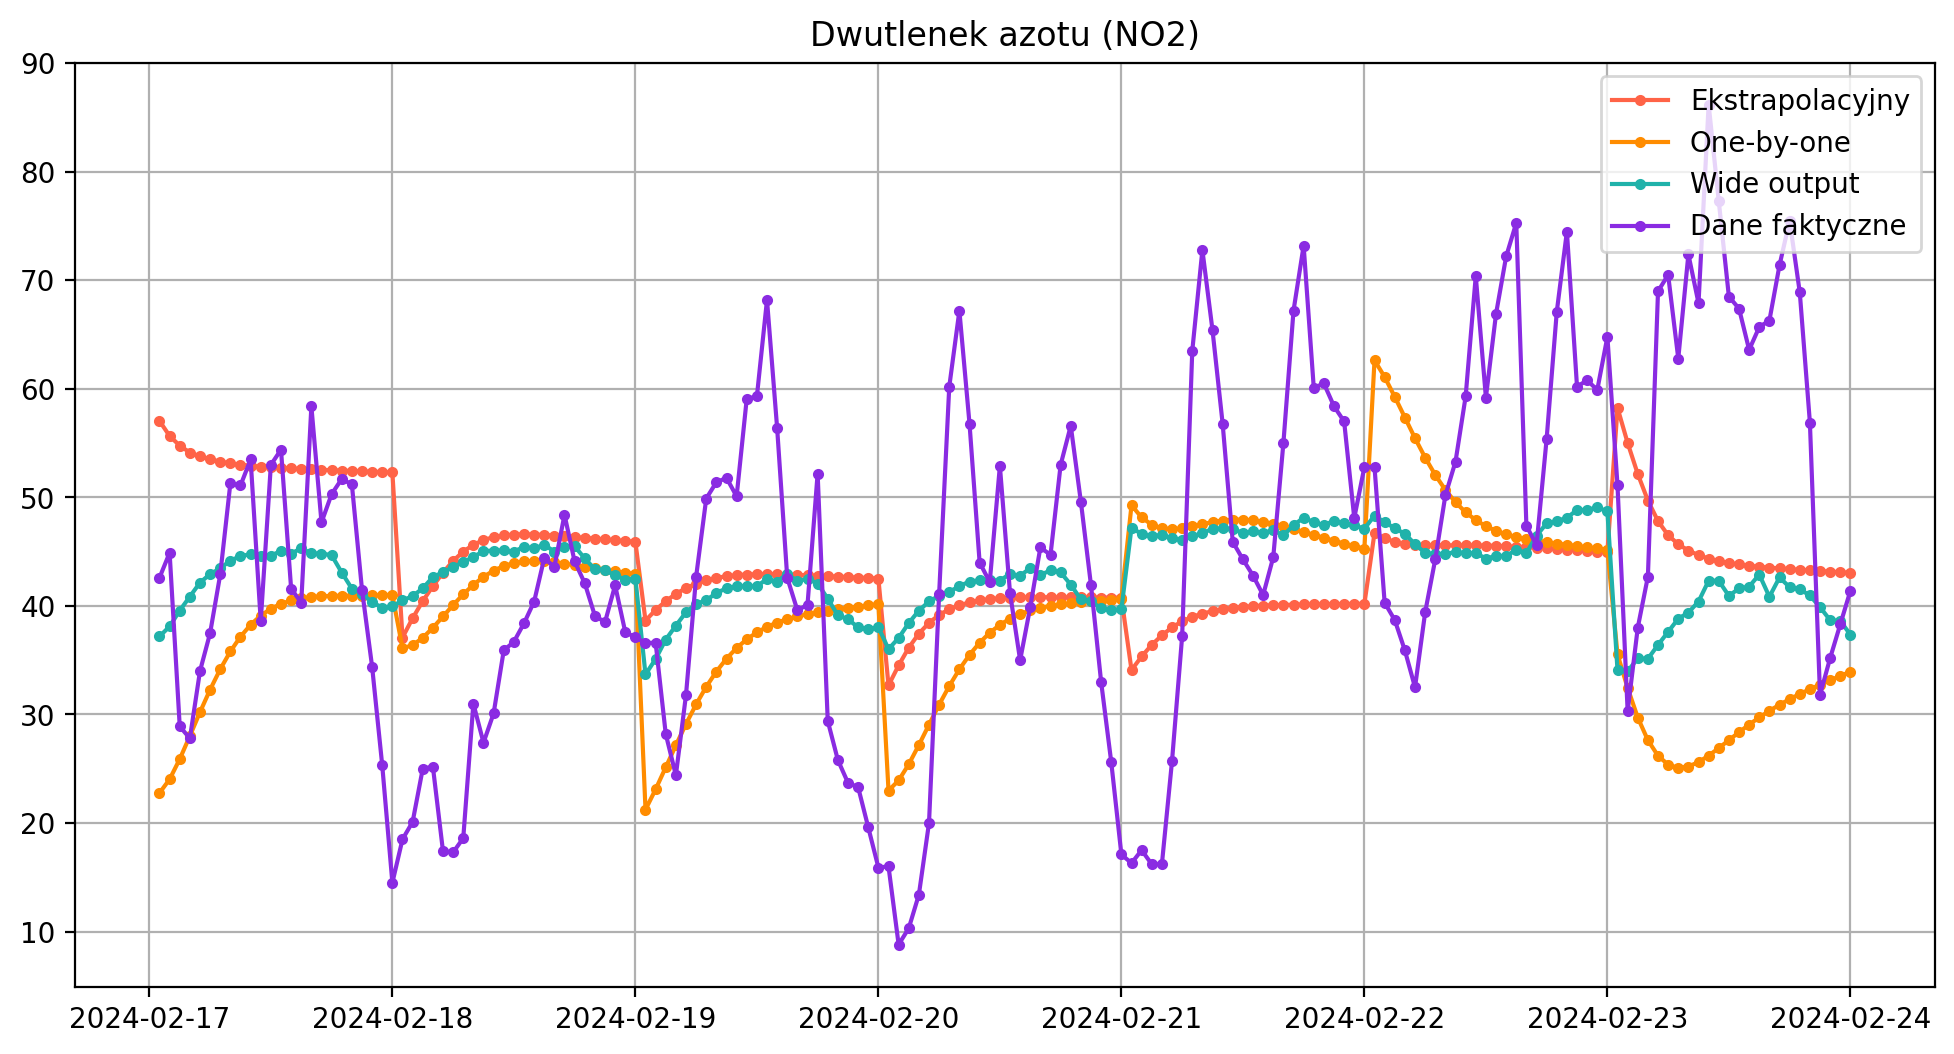

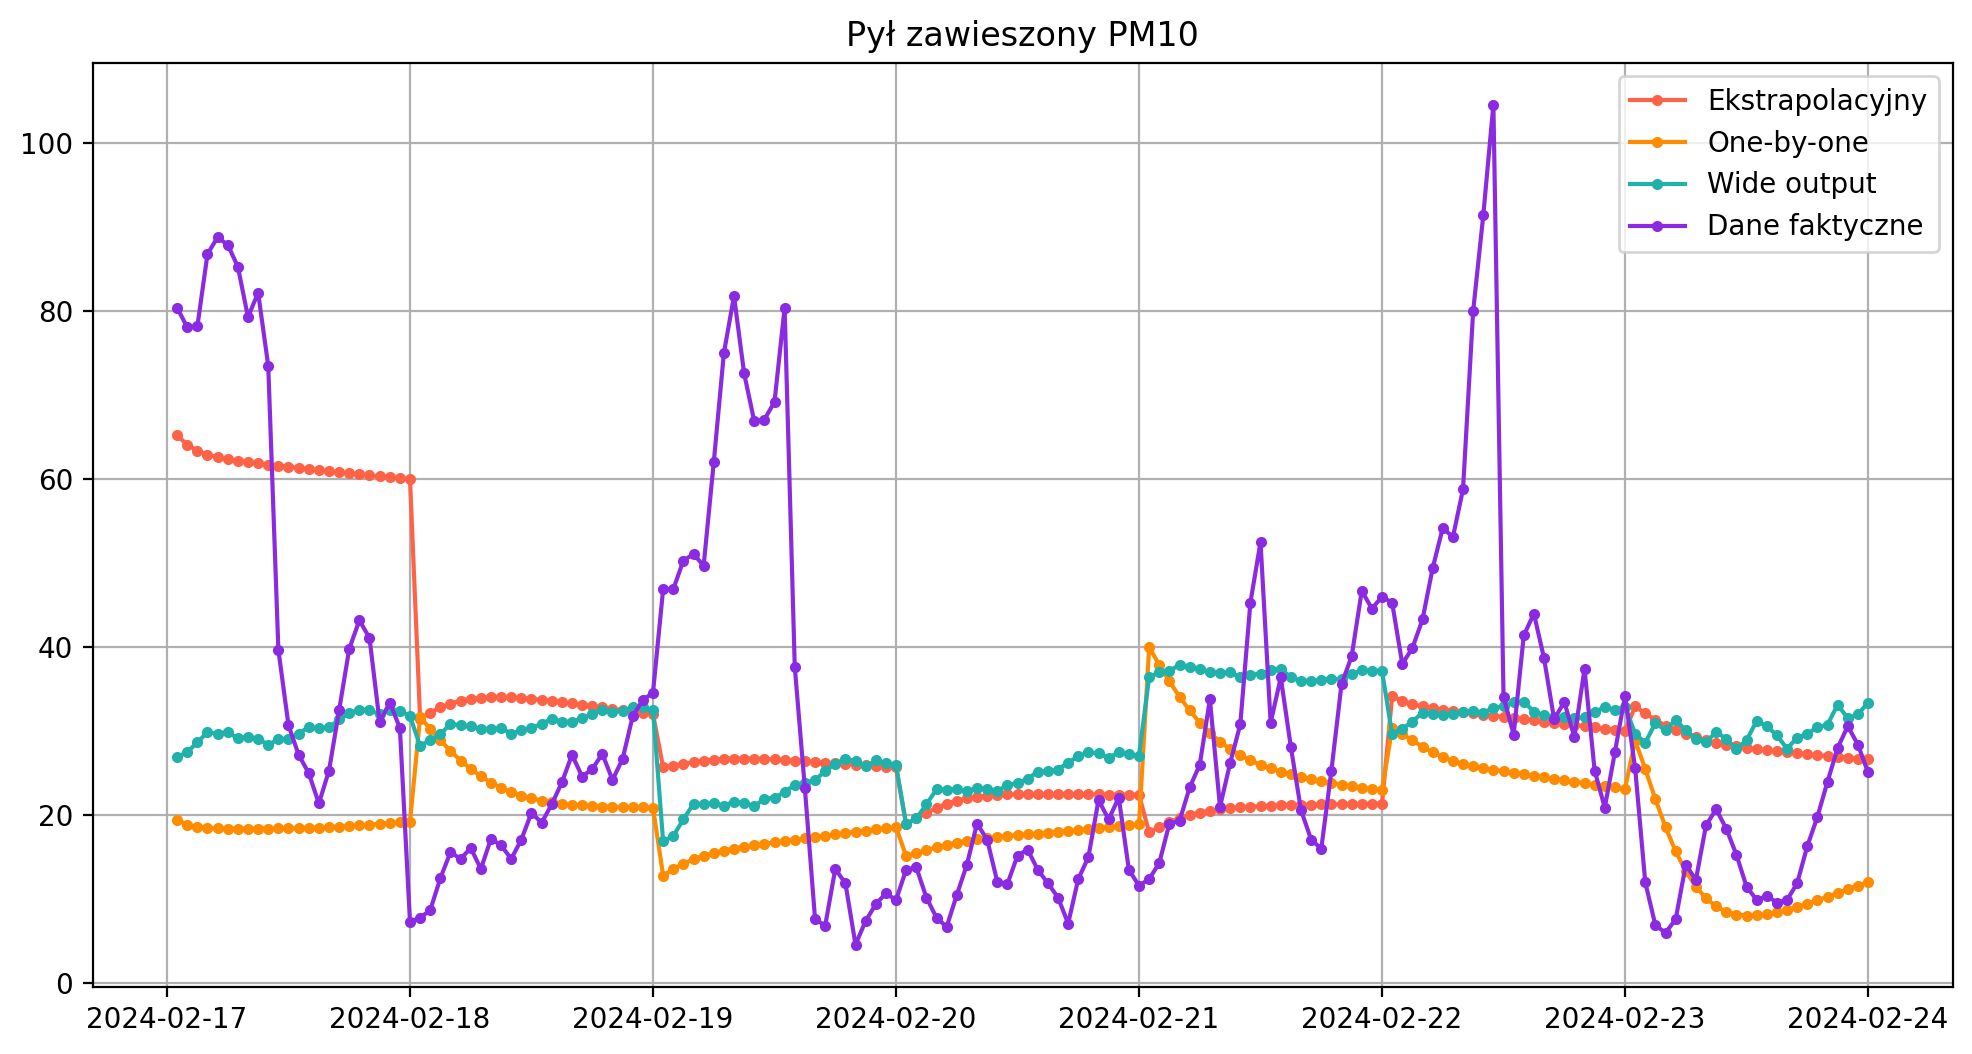

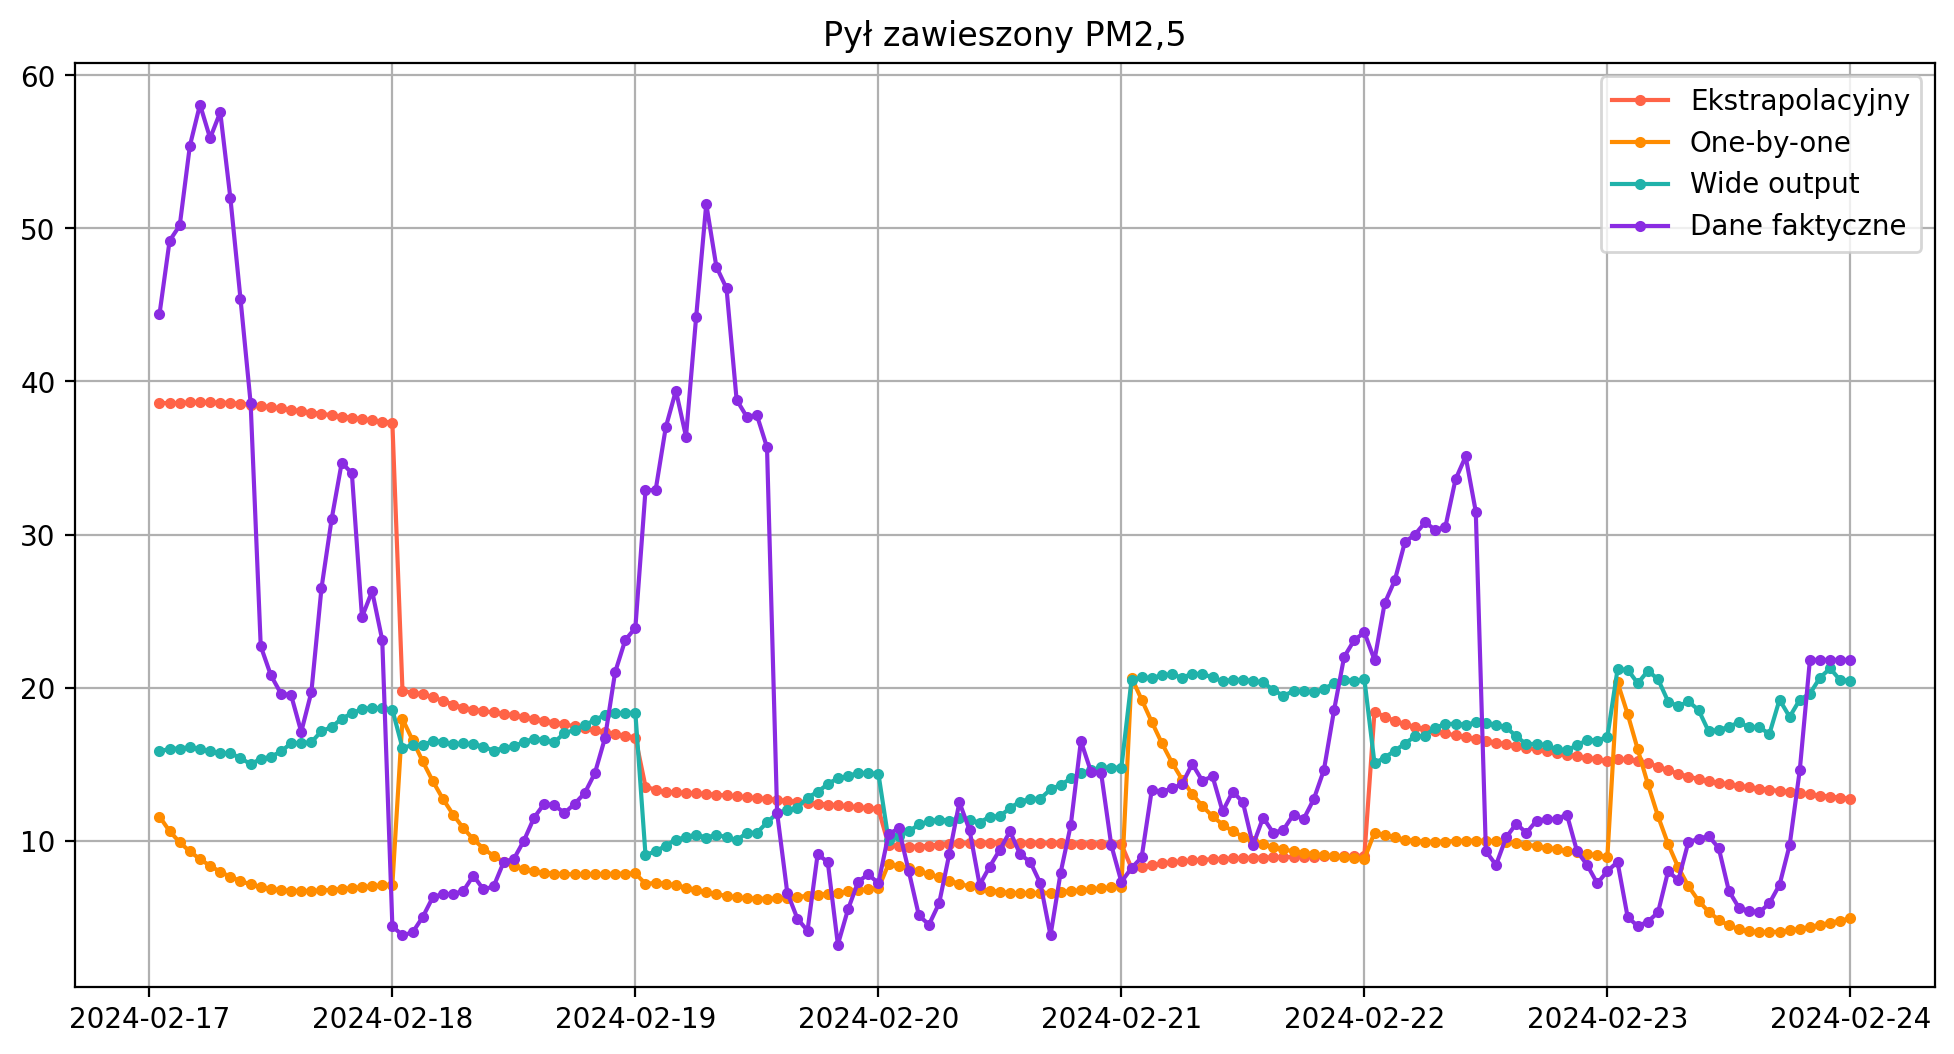

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

filenames = ['out/ext_valid', 'out/one_valid', 'out/wide_valid', 'out/true_valid']
labels = ['Ekstrapolacyjny', 'One-by-one', 'Wide output', 'Dane faktyczne']
colors = ['tomato', 'darkorange', 'lightseagreen', 'blueviolet']
dataframes = [pd.read_csv(filename, sep = ',', parse_dates = [0]) for filename in filenames]
column_names = ['Benzen', 'Tlenek węgla (CO)', 'Tlenki azotu', 'Tlenek azotu (NO)', 'Dwutlenek azotu (NO2)', 'Pył zawieszony PM10', 'Pył zawieszony PM2,5']

start, end = 24 * 10, 24 * 17
figure_size = 12, 6
dpi = 200
output_dir = 'out/images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, column_name in enumerate(column_names, start = 1):
    plt.figure(figsize = figure_size, dpi = dpi)
    for df, label, color in zip(dataframes, labels, colors):
        timestamps = df.iloc[:, 0].to_numpy()[start:end]
        series = df.iloc[:, i].to_numpy()[start:end]
        plt.plot(timestamps, series, '.-', label = label, color = color)
    plt.title(column_name)
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.xticks(rotation = 0)
    plt.savefig(f'out/images/{column_name}.png')